## Solving using standard FDM

$-u_{xx} - u_{yy} = f$ on boundary $\Omega = (0,1) \times (0,1)$, $u=0$ at boundary. Assume $\Delta x = \Delta y = h$

Approximation is then $F_{ij} = -\frac{1}{h^2}\big(u_{i-1j} + u_{ij-1} - 4u_{ij} + u_{i+1j} + u_{ij+1}\big)$, where $h$ is (uniform) mesh size

Or equivalently $A \mathbf{U} = F$, where $u_{ij} = u(x_i, y_j)$ with interior nodes $i,j=1,\dots,n$ 



System has $n^2$ unknowns, need to solve $A \mathbf{U} = \mathbf{F}(\mathbf{U})$

[4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4.]
Max error:  0.1860186073872703


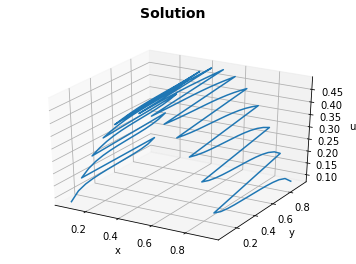

In [12]:
#Import necessary modules
import numpy as np
from scipy.sparse import diags, csr_matrix
from scipy.sparse.linalg import spsolve
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline

#Define parameters
N = 15 #total number of nodes in each direction
n = N-2 #number of internal nodes in each direction (unknowns)
h = 1/(n+1) #step size

#Define x and y as arrays between 0 and 1 with n evenly spaced points (internal nodes)
x = np.linspace(h, 1-h, n)
y = np.linspace(h, 1-h, n)

#Create internal mesh (excludes boundaries)
X, Y = np.meshgrid(x, y, indexing='ij')

#Define F 
F = np.empty([n**2])
for i in range(0, n**2):
    F[i]=4
        
#Define matrix A
diagonals = [[-4],[1],[1],[1],[1]]
A = np.multiply(-1/h**2, diags(diagonals, [0, -1, 1, -n, n], shape=(n**2, n**2)).toarray())
sA = csr_matrix(A) #Store CSR format of A

#Solve for U
U = spsolve(sA, F) #Solve using sparse solver
# U = np.reshape(U, (9,9))

#Compute exact solution for comparison
U_exact = X*(1-X) + Y*(1-Y)
U_exact = np.reshape(U_exact, -1)

#Plot solution
plt.figure(0)
plt.suptitle('Solution', fontsize=14, fontweight='bold')
ax = plt.axes(projection='3d')
xline = np.reshape(X, -1)
yline = np.reshape(Y, -1)
zline = np.reshape(U, -1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u')
ax.plot3D(xline, yline, zline)

print(np.matmul(A,U))

#Compute error at each node
max_error = 0
for i in range(0,n**2):
    if np.absolute(U_exact[i] - U[i]) > max_error:
        max_error = np.absolute(U_exact[i] - U[i])
print('Max error: ', max_error)

